In [109]:
#basics 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



#Evaluation

from sklearn.metrics import accuracy_score , confusion_matrix 

from sklearn.metrics import roc_auc_score , classification_report

In [110]:
#importing the Data 

import os 
print(os.listdir())




['.git', '.ipynb_checkpoints', 'Breast Cancer Prediction April 2021.ipynb', 'classfication_models.py', 'data.csv', 'finalized_model_breast.sav', 'Heart Disease Predictor .ipynb', 'heart.csv', 'heart_diesease.sav', 'README.md']


In [111]:
heart = pd.read_csv("heart.csv")

In [112]:
heart .head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [113]:
heart.shape

(303, 14)

In [114]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [115]:
#checking the missing values 

heart . isnull(). any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [116]:
#describe

heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


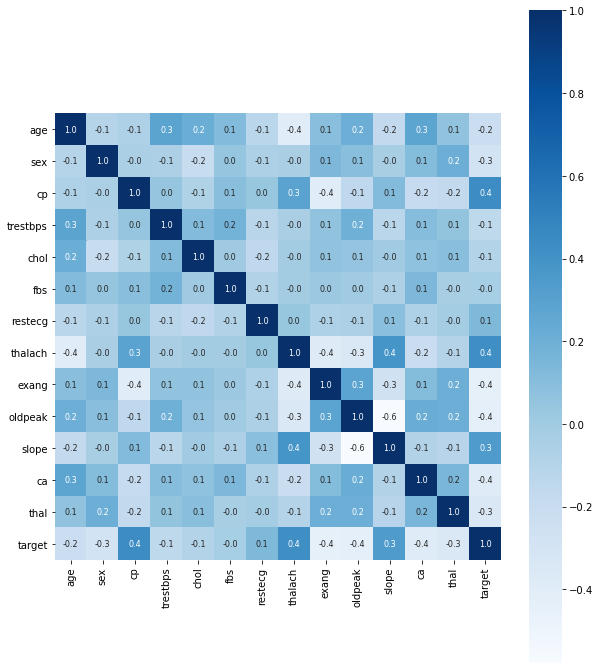

In [117]:
#heat map

plt.figure(figsize =(10,12))

corr = heart.corr()

sns.heatmap(corr,annot=True , cmap="Blues",fmt =".1f",cbar=True ,square = True ,annot_kws={"size":8})

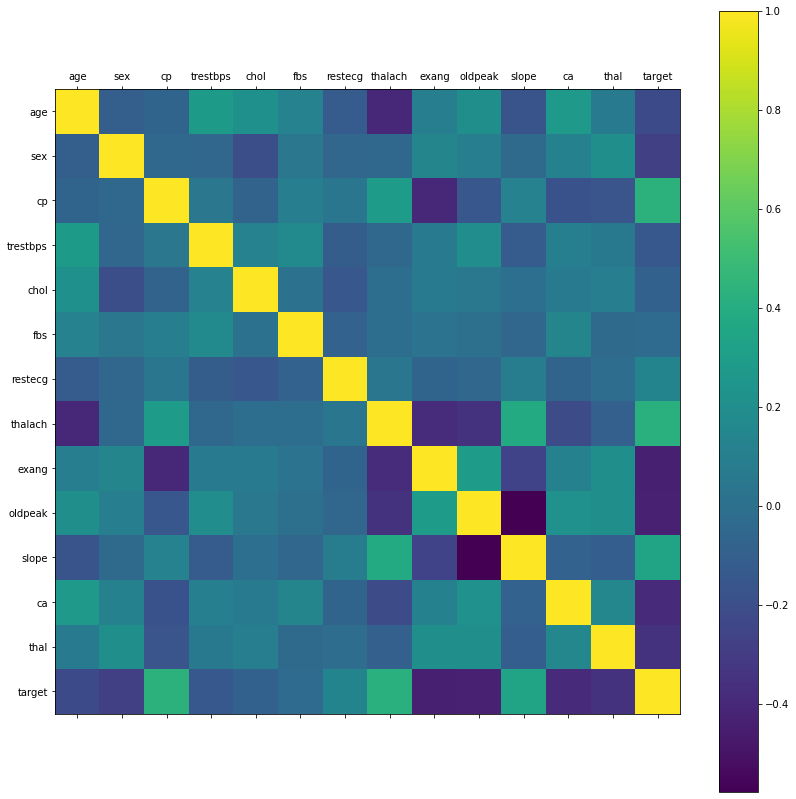

In [120]:
dataset = heart.copy()

# dataset.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
#        'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017FEDD38608>,
      dtype=object)

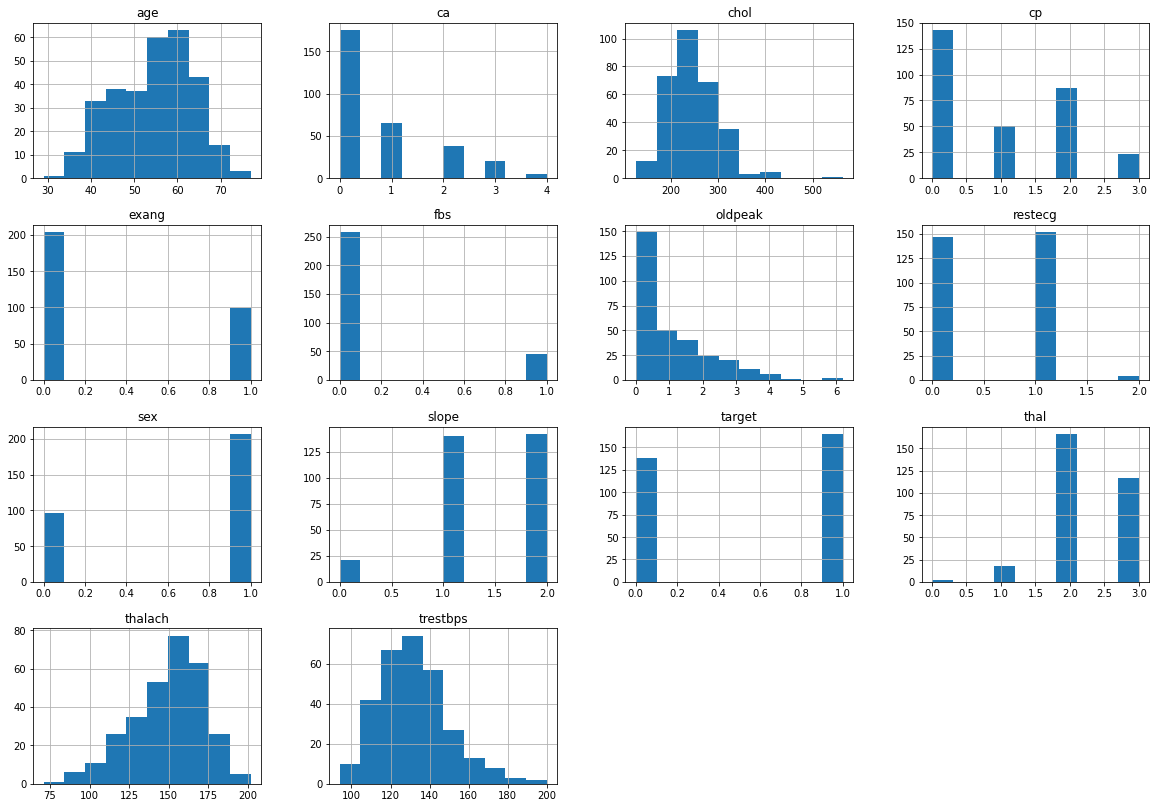

In [121]:
dataset . hist()

In [123]:
dataset["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [124]:
dataset['target'].unique()


array([1, 0], dtype=int64)

Text(0.5, 1.0, 'Count of each Target Class')

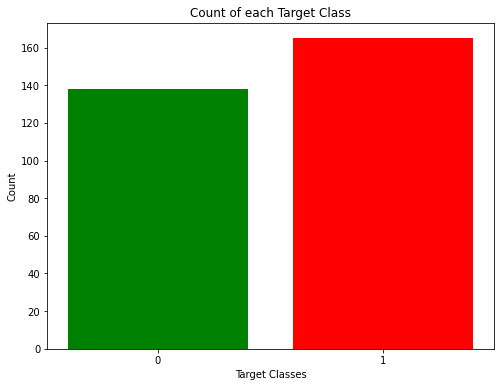

In [125]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [126]:
#shuffle the data

dataset = dataset.sample(frac=1)

In [127]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [128]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1


In [129]:
# Data Processing 

dataset . columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [130]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [131]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
142,42,120,209,173,0.0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
57,45,115,260,185,0.0,1,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
209,59,140,177,162,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
14,58,150,283,162,1.0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
302,57,130,236,174,0.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,140,187,144,4.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
41,48,130,245,180,0.2,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
145,70,156,245,143,0.0,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
16,58,120,340,172,0.0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [80]:
# standardScaler = StandardScaler()
# columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [132]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
142,42,120,209,173,0.0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
57,45,115,260,185,0.0,1,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
209,59,140,177,162,0.0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
14,58,150,283,162,1.0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0
302,57,130,236,174,0.0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,63,140,187,144,4.0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
41,48,130,245,180,0.2,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
145,70,156,245,143,0.0,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
16,58,120,340,172,0.0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [133]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017FED62F108>,
      dtype=object)

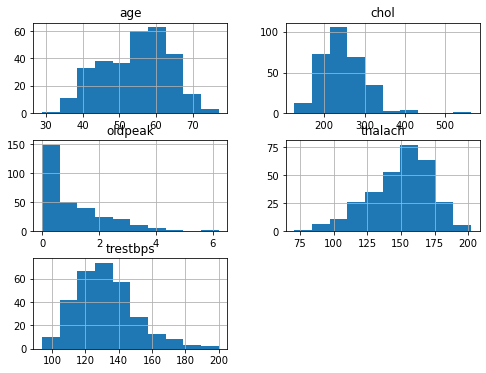

In [134]:
dataset[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist()

In [135]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

In [136]:
X_train.shape

(196, 30)

In [137]:
X_test.shape

(107, 30)

In [138]:
y_test.shape

(107,)

In [139]:
y_train.shape

(196,)

In [140]:
## Knn classifier 

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(round(knn_classifier.score(X_test, y_test),2))
    


In [141]:
knn_scores

[0.6,
 0.55,
 0.69,
 0.66,
 0.67,
 0.64,
 0.67,
 0.63,
 0.68,
 0.64,
 0.69,
 0.67,
 0.64,
 0.67,
 0.68,
 0.65,
 0.65,
 0.65,
 0.64,
 0.62]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

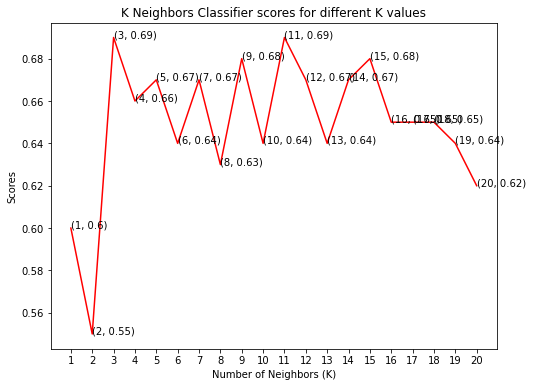

In [142]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [143]:
# Support Vector Classifier 


svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(round(svc_classifier.score(X_test, y_test),3)*100)



In [144]:
svc_scores

[84.1, 66.4, 64.5, 58.9]

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

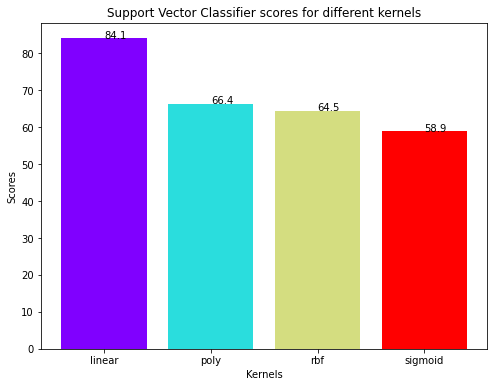

In [145]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [146]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

In [151]:
# Decision Tree Classifier

dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(round(dt_classifier.score(X_test, y_test),2))

In [152]:
# len(X.columns)

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

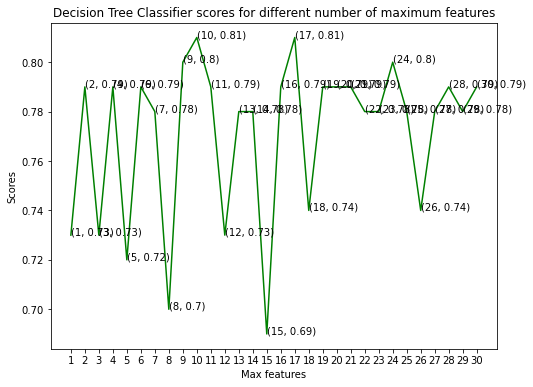

In [153]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [154]:
# Random Forest Classifier 

rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

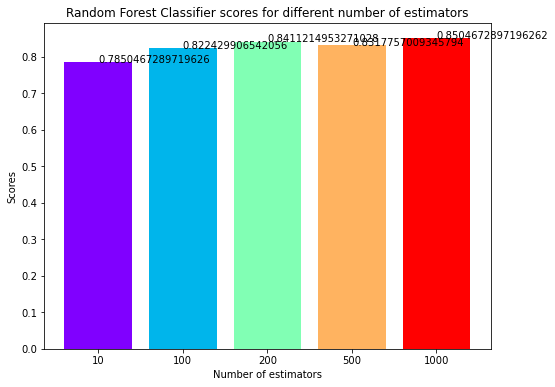

In [155]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [156]:
[i for i in range(len(estimators))]

[0, 1, 2, 3, 4]

In [157]:
[str(estimator) for estimator in estimators]

['10', '100', '200', '500', '1000']

In [158]:
max(knn_scores)

#with 8 neigbours 

0.69

In [159]:
max(svc_scores)

84.1

In [160]:
max(dt_scores)

0.81

In [161]:
max(rf_scores)

0.8504672897196262

In [49]:
# XG Boost 

# import xgboost as xgb

# from sklearn.model_selection import GridSearchCV

# clf = xgb.XGBClassifier()
# parameters = {
#      "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
#      "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
#      "min_child_weight" : [ 1, 3, 5, 7 ],
#      "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#      "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
#      }

# grid = GridSearchCV(clf,
#                     parameters, n_jobs=4,
#                     scoring="neg_log_loss",
#                     cv=3)

# grid.fit(X_train, y_train)

In [51]:
# grid.score(X_test,y_test)

In [162]:
y_pred = rf_classifier.predict(X_test)

In [163]:
print(accuracy_score(y_test,y_pred))

0.8504672897196262


In [164]:
model = [knn_classifier , svc_classifier , dt_classifier , rf_classifier]

for i in range(len(model)):
    y_pred = model[i].predict(X_test)
    print(f'{model[i]} Accuracy is ' , accuracy_score(y_test , y_pred))
    

KNeighborsClassifier(n_neighbors=20) Accuracy is  0.616822429906542
SVC(kernel='sigmoid') Accuracy is  0.5887850467289719
DecisionTreeClassifier(max_features=30, random_state=0) Accuracy is  0.7850467289719626
RandomForestClassifier(n_estimators=1000, random_state=0) Accuracy is  0.8504672897196262


In [165]:
# X_test

In [166]:
len(X_test.iloc[3].values)
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
31,65,120,177,140,0.4,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
227,35,120,198,130,1.6,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
40,51,140,308,142,1.5,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
202,58,150,270,111,0.8,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,54,192,283,195,0.0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
166,67,120,229,129,2.6,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
144,76,140,197,116,1.1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
137,62,128,208,140,0.0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [167]:
single_fe = X_test.iloc[96].values

single_fe = single_fe.reshape(1,-1)

knn_classifier.predict(single_fe)

array([1], dtype=int64)

In [168]:
y_test[96]

1

In [169]:
X_test.head(10)

X_test.loc[96]

age           62.0
trestbps     140.0
chol         394.0
thalach      157.0
oldpeak        1.2
sex_0          1.0
sex_1          0.0
cp_0           1.0
cp_1           0.0
cp_2           0.0
cp_3           0.0
fbs_0          1.0
fbs_1          0.0
restecg_0      1.0
restecg_1      0.0
restecg_2      0.0
exang_0        1.0
exang_1        0.0
slope_0        0.0
slope_1        1.0
slope_2        0.0
ca_0           1.0
ca_1           0.0
ca_2           0.0
ca_3           0.0
ca_4           0.0
thal_0         0.0
thal_1         0.0
thal_2         1.0
thal_3         0.0
Name: 96, dtype: float64

In [170]:
y_test.head(40)

31     1
227    0
298    0
40     1
202    0
254    0
81     1
42     1
240    0
36     1
197    0
47     1
153    1
174    0
259    0
246    0
238    0
177    0
96     1
78     1
126    1
272    0
107    1
4      1
112    1
156    1
21     1
12     1
277    0
19     1
17     1
93     1
105    1
208    0
168    0
34     1
134    1
113    1
111    1
9      1
Name: target, dtype: int64

In [171]:
# Testing



# columns to need to dummy 

columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']



In [172]:
X_test.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [173]:
age = int(input("enter the age "))
trestbps = int(input("enter the trestbps "))
chol = int(input("enter the chol "))
thalach = int(input("enter the thalach  "))
oldpeak = float(input("enter the oldpeak "))


temp_array = list()

sex = int(input(" 1. Male \n 0.Female :"))
if sex==1:
    temp_array = temp_array+[1,0]
else:
    temp_array = temp_array+[0,1]

    
cest_pain_type =  int(input(" 1: typical angina \n 2: atypical angina \n 3: non-anginal pain \n 4: asymptomatic pain : "))

if cest_pain_type==1:
    temp_array = temp_array +[1,0,0,0]
elif cest_pain_type == 2:
    temp_array = temp_array +[0,1,0,0]
elif cest_pain_type ==3:
    temp_array = temp_array +[0,0,1,0]
else:
    temp_array = temp_array +[0,0,0,1] 
    

    
fbs = int(input(" fasting blood sugar > 120 mg/dl) \n 1 = true; \n 0 = false : "))
if fbs ==1:
    temp_array+=[1,0]
else:
    temp_array+=[0,1]
    
restecg = int(input(" Esting electrocardiographic results \0: normal \n 1: having ST-T wave abnormality \n 2: showing probable or definite left ventricular: "))

if restecg == 0:
    temp_array+=[1,0,0]
elif restecg==1:
    temp_array+=[0,1,0]
else:
    temp_array+=[0,0,1]
    

exang = int(input(" exercise induced angina \n 1 = yes; \n 0 = no: ") )
if exang ==1:
    temp_array = temp_array+[1,0]
else:
    temp_array = temp_array[0,1]
    

slope = int(input(" the slope of the peak exercise ST segment \n 1: upsloping \n 2: flat \n 3: downsloping: "))
if slope ==1:
    temp_array = temp_array+[1,0,0]
elif slope==2:
    temp_array = temp_array+[0,1,0]
else:
    temp_array = temp_array+[0,0,1]
    
    
ca = int(input("number of major vessels (0-4) colored by flourosopy: "))

if ca==0:
    temp_array+=[1,0,0,0,0]
elif ca==1:
    temp_array+=[0,1,0,0,0]
elif ca==2:
    temp_array+=[0,0,1,0,0]
elif ca==3:
    temp_array+=[0,0,0,1,0]
else:
    temp_array+=[0,0,0,0,1]
    
    
thal = int(input("""Results of the blood flow observed via the radioactive dye \n
                    0: NULL \n 1: fixed defect \n 2: normal blood flow \n 3: reversible defect : """))

if thal ==0:
    temp_array+=[1,0,0,0]
elif thal==1:
    temp_array+=[0,1,0,0]
elif thal==2:
    temp_array+=[0,0,1,0]
else:
    temp_array+=[0,0,0,1]
    
    
    

scale_col =[age ,trestbps ,chol , thalach ,oldpeak]

print(scale_col,temp_array,scale_col+temp_array)




enter the age 


ValueError: invalid literal for int() with base 10: ''

In [ ]:
x_test1 = [59, 117, 230, 160, 1.4, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]

In [ ]:
x_test1 = np.array(x_test1)

x_test1 = x_test1.reshape(1,-1)

In [174]:
rf_classifier.predict(x_test1)

NameError: name 'x_test1' is not defined

In [175]:
heart.head(4)
list(X_test.columns)x

SyntaxError: invalid syntax (<ipython-input-175-03682818dec1>, line 2)

In [176]:
heart["cp"].value_counts()

# -- Value 1: typical angina
# -- Value 2: atypical angina
# -- Value 3: non-anginal pain
# -- Value 4: asymptomatic pain

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [177]:
heart["sex"].value_counts()

# sex: sex (1 = male; 0 = female)

1    207
0     96
Name: sex, dtype: int64

In [178]:
# exang: exercise induced angina (1 = yes; 0 = no)

heart["exang"].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [179]:
# 41 slope: the slope of the peak exercise ST segment
# -- Value 1: upsloping
# -- Value 2: flat
# -- Value 3: downsloping
heart["slope"].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [180]:
heart["ca"].value_counts()
# heart["ca"].unique()
# heart["ca"]

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [181]:
# fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
heart["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [182]:
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

# Value 0: NULL (dropped from the dataset previously)
# Value 1: fixed defect (no blood flow in some part of the heart)
# Value 2: normal blood flow
# Value 3: reversible defect (a blood flow is observed but it is not normal)
heart["thal"].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [183]:

heart["restecg"].value_counts()


# restecg: resting electrocardiographic results
# -- Value 0: normal
# -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

1    152
0    147
2      4
Name: restecg, dtype: int64

In [184]:
heart["target"].value_counts()

# target : 0 = disease, 1 = no disease


1    165
0    138
Name: target, dtype: int64

In [185]:
X_test

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
31,65,120,177,140,0.4,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
227,35,120,198,130,1.6,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
298,57,140,241,123,0.2,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
40,51,140,308,142,1.5,1,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
202,58,150,270,111,0.8,0,1,1,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,54,192,283,195,0.0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,1
166,67,120,229,129,2.6,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
144,76,140,197,116,1.1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
137,62,128,208,140,0.0,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [186]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [191]:
#saving the model 



rf_classifier1 = RandomForestClassifier(n_estimators = 1000, random_state = 0)

rf_classifier1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [192]:
rf_classifier1.score(X_test,y_test)

0.8504672897196262

In [193]:
y_pred = rf_classifier1.predict(X_test)

In [194]:
print(accuracy_score(y_test,y_pred))

0.8504672897196262


In [195]:
import joblib 

file_name = "heart_diesease.sav"
joblib.dump(model, file_name)


['heart_diesease.sav']

In [199]:
new_col =['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

In [200]:
heart2 = heart.copy()

heart2.columns =new_col

In [201]:
heart2

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [203]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
